## Business Case

For this case you will try to find fraudulent cases in the Database with Historical Claims of our customer “Farid Insurances”, by using Python as your programming language. Farid Insurances is using only one Line of Business, which is Motor. This means that every claim in the Database will contain an object, which is a car.

There are three CSV files needed for the case, called “fraud_cases.csv”, “ClaimHistory_training.csv” and “ClaimHistory_validation.csv”. Note that each row in the data represents a claim and each column in the data represents a variable belonging to the claim. 

1)	Find out which of the 80.000 cases in the training data are fraudulent cases, by mapping the file “fraud_cases.csv” to the training data. How many fraud cases can you find?

2)	The customer wants to know when the number of days between the occurrence of the claim and the report date of the claim is high. Based on this information, an indicator at Farid can be made. Explain what you think is a high number, based on the training data.

3)	Clean the data by removing irrelevant features, cleaning up features and by engineering any useful new feature that you might think of.

4)	Train a model based on the training data and the responding fraud cases. Choose any model you like. Keep in mind that the data is very imbalanced and you should be able to explain your model to business!

5)	Classify the validation set (20.000 cases)

6)	Report the results in confusion matrix.

## Feature names: 

#### 'sys_sector' - Sector in which the claim occured
#### 'sys_process' -
#### 'sys_product'- 
#### 'sys_dataspecification_version' 
#### 'sys_claimid'- Claim ID
#### 'sys_currency_code'- Currency code of the payment.
#### 'claim_amount_claimed_total' - Total Amount for which the claim was made.
#### 'claim_causetype' - Cause of the accident.
#### 'claim_date_occurred' - The date at which accident occured.
#### 'claim_date_reported' - The date at which claim was reported.
#### 'claim_location_urban_area', - The area in which claim happened is urban or not. (1 - Urban)
#### 'object_make' - The make of motor insured.
#### 'object_year_construction'- Manufacturing year of motor.
#### 'ph_firstname'- Policy holder's first name.
#### 'ph_gender' - Policy holder's gender.
#### 'ph_name' - Policy holder's  name.
#### 'policy_fleet_flag' - Is the policy taken for fleet or individual motor. (1- Fleet motor)
#### 'policy_insured_amount' - Insured amount of policy.
####  'policy_profitability' -  profitable category for insurance policy.


## Importing Libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

## Loading the databases

In [2]:
data1 = pd.read_csv('fraud_cases.csv')
data1.head()

,ClaimID,Date_Occurred
0,768000066,20120707
1,709296250,20120711
2,726714358,20120712
3,520593970,20120716
4,102695400,20120726


In [3]:
## This data will be used for training the model
data2 = pd.read_csv('ClaimHistory_training.csv')
data2.head()

,sys_sector,sys_process,sys_product,sys_dataspecification_version,sys_claimid,sys_currency_code,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,ph_name,policy_fleet_flag,policy_insured_amount,policy_profitability
0,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-338957796-02,EUR,2433.0,Collision,20121022,20121127,1,VOLKSWAGEN,2008.0,Teresita,F,Sanchez,0,74949.0,Low
1,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-434911509-02,EUR,3791.0,Collision,20140612,20140618,1,CITROEN,2003.0,Charanaka,M,Yim,0,100648.0,Very low
2,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-615568027-02,EUR,452.0,Collision,20130506,20130923,1,RENAULT,2001.0,Wisaam,L,el-Kalil,0,NaN,Low
3,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-917387010-02,EUR,555.0,Collision,20171112,20171206,1,RENAULT,2017.0,Dillon,M,Hilfiker,0,121081.0,High
4,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-281513737-02,EUR,382.0,Collision,20151021,20151202,1,BMW,2011.0,Carmen,F,Lovelace,0,94538.0,Very high


In [4]:
## This data is for validation of model
data3 = pd.read_csv('ClaimHistory_validation.csv')
data3.head()

,sys_sector,sys_process,sys_product,sys_dataspecification_version,sys_claimid,sys_currency_code,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,ph_name,policy_fleet_flag,policy_insured_amount,policy_profitability,sys_fraud
0,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-666202639-02,EUR,2627.0,Collision,20150521,20160916,0,OTHER,2014.0,Shishan,F,Lor,0,114718.0,Very low,0
1,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-258901077-02,EUR,269.0,Other,20130302,20130304,0,AUDI,1999.0,Dominic,M,Purnell,0,117522.0,Neutral,0
2,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-547929317-02,EUR,157.0,Collision,20121030,20121127,1,RENAULT,2009.0,Katalina,F,Shea,0,72287.0,Low,0
3,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-745856657-02,EUR,299.0,Collision,20150824,20150826,0,BMW,2008.0,Ebonee,F,Ryan,0,112630.0,Low,0
4,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-686506389-02,EUR,211.0,Theft,20141126,20141226,0,OTHER,2000.0,Emonie,F,Hester,0,104030.0,Neutral,0


## Exploring the dataset

In [5]:
### checking the info of datasets
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ClaimID        618 non-null    object
 1   Date_Occurred  618 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.8+ KB


In [6]:
# Checking the count of rows and columns of datasets
data1.shape

(618, 2)

In [7]:
## checking the basic statistics of the dataset
data1.describe()

,Date_Occurred
count,6.180000e+02
mean,2.014854e+07
std,1.606403e+04
min,2.012071e+07
25%,2.013113e+07
50%,2.015051e+07
75%,2.016081e+07
max,2.018021e+07


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sys_sector                     80000 non-null  object 
 1   sys_process                    80000 non-null  object 
 2   sys_product                    80000 non-null  object 
 3   sys_dataspecification_version  80000 non-null  float64
 4   sys_claimid                    80000 non-null  object 
 5   sys_currency_code              80000 non-null  object 
 6   claim_amount_claimed_total     80000 non-null  float64
 7   claim_causetype                79998 non-null  object 
 8   claim_date_occurred            80000 non-null  int64  
 9   claim_date_reported            80000 non-null  int64  
 10  claim_location_urban_area      80000 non-null  int64  
 11  object_make                    80000 non-null  object 
 12  object_year_construction       80000 non-null 

In [9]:
data2.shape

(80000, 19)

In [10]:
data2.describe()

,sys_dataspecification_version,claim_amount_claimed_total,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_year_construction,policy_fleet_flag,policy_insured_amount
count,80000.0,80000.000000,8.000000e+04,8.000000e+04,80000.000000,80000.000000,80000.000000,49181.000000
mean,4.5,3222.524212,2.014941e+07,2.014996e+07,0.530813,2008.664625,0.321487,60011.545394
std,0.0,9940.736169,1.652238e+04,1.662538e+04,0.499053,5.116219,0.467050,24628.603336
min,4.5,2.000000,2.012070e+07,2.012070e+07,0.000000,1948.000000,0.000000,6531.000000
25%,4.5,296.000000,2.013122e+07,2.014011e+07,0.000000,2006.000000,0.000000,44928.000000
50%,4.5,883.000000,2.015070e+07,2.015072e+07,1.000000,2010.000000,0.000000,53102.000000
75%,4.5,2657.000000,2.016101e+07,2.016110e+07,1.000000,2012.000000,1.000000,64159.000000
max,4.5,424720.000000,2.018021e+07,2.024081e+07,1.000000,2020.000000,1.000000,193681.000000


## Checking NULL values

In [11]:
data1.isna().sum()

ClaimID          0
Date_Occurred    0
dtype: int64

In [12]:
data2.isna().sum()

sys_sector                           0
sys_process                          0
sys_product                          0
sys_dataspecification_version        0
sys_claimid                          0
sys_currency_code                    0
claim_amount_claimed_total           0
claim_causetype                      2
claim_date_occurred                  0
claim_date_reported                  0
claim_location_urban_area            0
object_make                          0
object_year_construction             0
ph_firstname                         0
ph_gender                          798
ph_name                              0
policy_fleet_flag                    0
policy_insured_amount            30819
policy_profitability                 0
dtype: int64

In [13]:
## Finding the percentage of NULL values for the test data

In [14]:
null_percentage = data2.isna().sum() * 100 / len(data2)
null_percentage

sys_sector                        0.00000
sys_process                       0.00000
sys_product                       0.00000
sys_dataspecification_version     0.00000
sys_claimid                       0.00000
sys_currency_code                 0.00000
claim_amount_claimed_total        0.00000
claim_causetype                   0.00250
claim_date_occurred               0.00000
claim_date_reported               0.00000
claim_location_urban_area         0.00000
object_make                       0.00000
object_year_construction          0.00000
ph_firstname                      0.00000
ph_gender                         0.99750
ph_name                           0.00000
policy_fleet_flag                 0.00000
policy_insured_amount            38.52375
policy_profitability              0.00000
dtype: float64

## Concatinating the table to understand the pattern of fraud claims

In [15]:
#checking how can claim id of train dataset can be joined with fraud dataset
data2.sys_claimid.unique()

array(['MTR-338957796-02', 'MTR-434911509-02', 'MTR-615568027-02', ...,
       'MTR-591101349-02', 'MTR-790242664-02', 'MTR-815745885-02'],
      dtype=object)

In [16]:
# we have to extract the 9 digit claim id to merge the datasets with claim id

In [17]:
# converting the claim id into a string to extract the desired numbers from the id
# checking the length of claim id to make sure all the claim id's have the same length
data2['len_claimid']=  data2['sys_claimid'].str.len() 
data2['len_claimid'].unique()

array([16])

In [18]:
# extracting the sub string from claim id to concatinate with fraud data
data2['new_claimid'] = data2['sys_claimid'].str[4:13]
data2['new_claimid'].head()

0    338957796
1    434911509
2    615568027
3    917387010
4    281513737
Name: new_claimid, dtype: object

In [19]:
# Merging the data using left join on new_claimid and ClaimID
train_data = data2.merge(data1,how="left",left_on="new_claimid",right_on="ClaimID")

In [20]:
train_data.head()

,sys_sector,sys_process,sys_product,sys_dataspecification_version,sys_claimid,sys_currency_code,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,...,ph_firstname,ph_gender,ph_name,policy_fleet_flag,policy_insured_amount,policy_profitability,len_claimid,new_claimid,ClaimID,Date_Occurred
0,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-338957796-02,EUR,2433.0,Collision,20121022,20121127,...,Teresita,F,Sanchez,0,74949.0,Low,16,338957796,NaN,NaN
1,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-434911509-02,EUR,3791.0,Collision,20140612,20140618,...,Charanaka,M,Yim,0,100648.0,Very low,16,434911509,NaN,NaN
2,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-615568027-02,EUR,452.0,Collision,20130506,20130923,...,Wisaam,L,el-Kalil,0,NaN,Low,16,615568027,NaN,NaN
3,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-917387010-02,EUR,555.0,Collision,20171112,20171206,...,Dillon,M,Hilfiker,0,121081.0,High,16,917387010,NaN,NaN
4,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-281513737-02,EUR,382.0,Collision,20151021,20151202,...,Carmen,F,Lovelace,0,94538.0,Very high,16,281513737,NaN,NaN


In [21]:
### to convert the dataset in CSV
#train_data.to_csv('fraud_dataset.csv')

In [22]:
train_data.shape

(80000, 23)

In [23]:
# Checking for the claim id of dataframe which successfully merged
train_data.ClaimID.nunique()  

615

In [24]:
# Checking Claim IDs of fraud data and train data to check where merging was unsuccefull
set(data1.ClaimID.unique())-set(train_data.ClaimID.unique())

{'355905469/622895187', '453637761/522337148', '930746044/840746503'}

In [25]:
# Checking the IDs in fraud data(data1)
data1[data1.ClaimID.isin(['355905469/622895187', '453637761/522337148', '930746044/840746503'])]

,ClaimID,Date_Occurred
20,355905469/622895187,20120929
51,930746044/840746503,20130102
597,453637761/522337148,20171025


In [26]:
# We are not sure aboout which 3 are fraud as the claim id are merged with each other

In [27]:
# Checking the data for these claim ids in train data
# Putting the IDs in a variable to check the
Missing_ID = ['355905469','622895187', '453637761','522337148', '930746044','840746503']

In [28]:
# Checking the new clain ID for the Missing IDs
train_data[train_data.new_claimid.isin(Missing_ID)]

,sys_sector,sys_process,sys_product,sys_dataspecification_version,sys_claimid,sys_currency_code,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,...,ph_firstname,ph_gender,ph_name,policy_fleet_flag,policy_insured_amount,policy_profitability,len_claimid,new_claimid,ClaimID,Date_Occurred
3127,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-930746044-02,EUR,1285.0,Theft,20130102,20130104,...,Katelyn,F,Keyes,0,NaN,Very high,16,930746044,NaN,NaN
3447,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-840746503-02,EUR,118.0,Collision,20130104,20130130,...,Paul,L,Kunzman,0,102157.0,High,16,840746503,NaN,NaN
10438,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-522337148-02,EUR,159.0,Collision,20171031,20171230,...,Hugo,M,Lepure,0,76308.0,Neutral,16,522337148,NaN,NaN
11324,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-622895187-02,EUR,374.0,Weather,20121001,20121102,...,Christian,M,Rivera,0,NaN,Low,16,622895187,NaN,NaN
46960,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-355905469-02,EUR,4292.0,Collision,20120929,20121208,...,Jennifer,L,Gonzales,1,NaN,Low,16,355905469,NaN,NaN
59336,Private NonLife,Claims_initial_load,MOTOR,4.5,MTR-453637761-02,EUR,1208.0,Collision,20171025,20171118,...,Asia,F,Zerom,0,42500.0,High,16,453637761,NaN,NaN


In [29]:
# Assuming the 3 IDs that are mixed as a not a fraud case

In [30]:
train_data.columns

Index(['sys_sector', 'sys_process', 'sys_product',
       'sys_dataspecification_version', 'sys_claimid', 'sys_currency_code',
       'claim_amount_claimed_total', 'claim_causetype', 'claim_date_occurred',
       'claim_date_reported', 'claim_location_urban_area', 'object_make',
       'object_year_construction', 'ph_firstname', 'ph_gender', 'ph_name',
       'policy_fleet_flag', 'policy_insured_amount', 'policy_profitability',
       'len_claimid', 'new_claimid', 'ClaimID', 'Date_Occurred'],
      dtype='object')

## Changing Data types of Data columns in the train data set and analyzing the data set

In [31]:
# start and end date of columns
print("Start of claim_date_occurred :",train_data.claim_date_occurred.min())
print("End of claim_date_occurred :",train_data.claim_date_occurred.max())
print("Start of claim_date_reported :",train_data.claim_date_reported.min())
print("End of claim_date_reported :",train_data.claim_date_reported.max())

Start of claim_date_occurred : 20120701
End of claim_date_occurred : 20180208
Start of claim_date_reported : 20120701
End of claim_date_reported : 20240809


In [32]:
# changing datatype of "claim_date_reported" column
train_data['claim_date_reported'] = pd.to_datetime(train_data.claim_date_reported.astype(str), format='%Y%m%d')

In [33]:
# Maximum possible date is '20240809' for this analysis as claim can't be raise in future dates
train_data['claim_date_reported_new'] =  pd.to_datetime('20240809')
train_data['claim_date_reported_new']= np.where( train_data.claim_date_reported > pd.to_datetime('20240809'), train_data['claim_date_reported_new'],train_data['claim_date_reported'])

In [34]:
# Calculating the difference between reported date and occurance date
train_data['diff_days_between_claim_occ_report']= (train_data.claim_date_reported_new  - pd.to_datetime(train_data.claim_date_occurred.astype(str), format='%Y%m%d'))/np.timedelta64(1, 'D')

In [35]:
# Checking all the date columns for irregualrites
train_data[['claim_date_reported','claim_date_reported_new','claim_date_occurred','diff_days_between_claim_occ_report']].sort_values('diff_days_between_claim_occ_report',ascending=False).head(5)

,claim_date_reported,claim_date_reported_new,claim_date_occurred,diff_days_between_claim_occ_report
5838,2023-05-04,2023-05-04,20150925,2778.0
3045,2022-12-07,2022-12-07,20150901,2654.0
1140,2021-10-29,2021-10-29,20140829,2618.0
3764,2021-06-17,2021-06-17,20140419,2616.0
706,2024-08-09,2024-08-09,20170627,2600.0


In [36]:
# let us check the quantile distribution of difference in days between claim and reported date
train_data.diff_days_between_claim_occ_report.quantile([.5,.6,.7,.8,.85,.89,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,.995,.999,.9999,1])

0.5000       4.0000
0.6000       7.0000
0.7000      11.0000
0.8000      19.0000
0.8500      26.0000
0.8900      36.0000
0.9000      40.0000
0.9100      44.0000
0.9200      50.0000
0.9300      56.0000
0.9400      64.0000
0.9500      76.0000
0.9600      92.0000
0.9700     116.0000
0.9800     164.0000
0.9900     272.0000
0.9950     434.0000
0.9990     876.0000
0.9999    2382.0034
1.0000    2778.0000
Name: diff_days_between_claim_occ_report, dtype: float64

#### Findings from the analysis
If the claim report and claim occurance has gap of more than "76" days then we can consider it as high.
#### Reasons for the above conclusion
95% of customers claim before 76 days as per training data.
From 95% to 96% Looks like a sharp increase from ~2.5months to ~3months. 
As per business sense,it seems little difficult to understand why will a customers wait for more than ~2 months to make a claim

## Describing the data to check for the columns that needs to be dropped

In [37]:
# Basic data statistics of numerical data
train_data.describe()

,sys_dataspecification_version,claim_amount_claimed_total,claim_date_occurred,claim_location_urban_area,object_year_construction,policy_fleet_flag,policy_insured_amount,len_claimid,Date_Occurred,diff_days_between_claim_occ_report
count,80000.0,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,49181.000000,80000.0,6.150000e+02,80000.000000
mean,4.5,3222.524212,2.014941e+07,0.530813,2008.664625,0.321487,60011.545394,16.0,2.014858e+07,20.027287
std,0.0,9940.736169,1.652238e+04,0.499053,5.116219,0.467050,24628.603336,0.0,1.602167e+04,72.147829
min,4.5,2.000000,2.012070e+07,0.000000,1948.000000,0.000000,6531.000000,16.0,2.012071e+07,0.000000
25%,4.5,296.000000,2.013122e+07,0.000000,2006.000000,0.000000,44928.000000,16.0,2.013116e+07,2.000000
50%,4.5,883.000000,2.015070e+07,1.000000,2010.000000,0.000000,53102.000000,16.0,2.015051e+07,4.000000
75%,4.5,2657.000000,2.016101e+07,1.000000,2012.000000,1.000000,64159.000000,16.0,2.016081e+07,14.000000
max,4.5,424720.000000,2.018021e+07,1.000000,2020.000000,1.000000,193681.000000,16.0,2.018021e+07,2778.000000


In [38]:
# Checking statistics of categorical columns
train_data.describe(include = 'all')

,sys_sector,sys_process,sys_product,sys_dataspecification_version,sys_claimid,sys_currency_code,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,...,ph_name,policy_fleet_flag,policy_insured_amount,policy_profitability,len_claimid,new_claimid,ClaimID,Date_Occurred,claim_date_reported_new,diff_days_between_claim_occ_report
count,80000,80000,80000,80000.0,80000,80000,80000.000000,79998,8.000000e+04,80000,...,80000,80000.000000,49181.000000,80000,80000.0,80000,615,6.150000e+02,80000,80000.000000
unique,1,1,1,NaN,79998,1,NaN,5,NaN,2280,...,18237,NaN,NaN,5,NaN,79998,615,NaN,2280,NaN
top,Private NonLife,Claims_initial_load,MOTOR,NaN,MTR-603112190-02,EUR,NaN,Collision,NaN,2016-06-25 00:00:00,...,Nguyen,NaN,NaN,Very low,NaN,491813645,393382568,NaN,2016-06-25 00:00:00,NaN
freq,80000,80000,80000,NaN,2,80000,NaN,48955,NaN,122,...,630,NaN,NaN,17529,NaN,2,1,NaN,122,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-09 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-09 00:00:00,NaN
mean,NaN,NaN,NaN,4.5,NaN,NaN,3222.524212,NaN,2.014941e+07,NaN,...,NaN,0.321487,60011.545394,NaN,16.0,NaN,NaN,2.014858e+07,NaN,20.027287
std,NaN,NaN,NaN,0.0,NaN,NaN,9940.736169,NaN,1.652238e+04,NaN,...,NaN,0.467050,24628.603336,NaN,0.0,NaN,NaN,1.602167e+04,NaN,72.147829
min,NaN,NaN,NaN,4.5,NaN,NaN,2.000000,NaN,2.012070e+07,NaN,...,NaN,0.000000,6531.000000,NaN,16.0,NaN,NaN,2.012071e+07,NaN,0.000000
25%,NaN,NaN,NaN,4.5,NaN,NaN,296.000000,NaN,2.013122e+07,NaN,...,NaN,0.000000,44928.000000,NaN,16.0,NaN,NaN,2.013116e+07,NaN,2.000000


In [39]:
# dropping the coulmns with only 1 unique value
drop_col= ['sys_sector' ,'sys_process' ,'sys_product','sys_dataspecification_version','sys_currency_code']
train_data.drop(columns=drop_col, axis = 1,inplace=True)

In [40]:
train_data.columns

Index(['sys_claimid', 'claim_amount_claimed_total', 'claim_causetype',
       'claim_date_occurred', 'claim_date_reported',
       'claim_location_urban_area', 'object_make', 'object_year_construction',
       'ph_firstname', 'ph_gender', 'ph_name', 'policy_fleet_flag',
       'policy_insured_amount', 'policy_profitability', 'len_claimid',
       'new_claimid', 'ClaimID', 'Date_Occurred', 'claim_date_reported_new',
       'diff_days_between_claim_occ_report'],
      dtype='object')

In [41]:
train_data.shape

(80000, 20)

## Data Santity Checks

####  1.Checking if 'claim_date_reported_new' < 'claim_date_occurred'. It should not have any such rows because it is not possible to report a claim before it has occured

In [42]:
train_data[train_data.claim_date_reported < pd.to_datetime(train_data.claim_date_occurred.astype(str), format='%Y%m%d')].shape

(0, 20)

#### Finding -  From the output we conclude that there is no such cases where the date occured is bigger that data claimed

__________________________________________________________________________________________________________

#### 2.Checking if 'object_year_construction' > 'claim_date_occurred'. It should not have any such rows because vehicle construction should be before claim date

In [43]:
train_data[train_data.object_year_construction > pd.to_datetime(train_data.claim_date_occurred.astype(str), format='%Y%m%d').dt.year][['claim_date_occurred','object_year_construction']]

,claim_date_occurred,object_year_construction
159,20160219,2017.0
415,20140830,2016.0
959,20130510,2014.0
1912,20130409,2017.0
2012,20140627,2015.0
...,...,...
79947,20170811,2018.0
79958,20121228,2014.0
79970,20130828,2014.0
79978,20140516,2016.0


#### Finding - 4582 cases are present where year of construction of vehicle is after claims made which is not possible.
####                  We will correct this by making year of construction in these cases equal to year of claim occurance.

In [44]:
# Calculating the new year of construction
train_data['object_year_construction_new']= np.where( train_data.object_year_construction >pd.to_datetime(train_data.claim_date_occurred.astype(str), format='%Y%m%d').dt.year,pd.to_datetime(train_data.claim_date_occurred.astype(str), format='%Y%m%d').dt.year,train_data['object_year_construction'])
train_data[train_data.object_year_construction >pd.to_datetime(train_data.claim_date_occurred.astype(str), format='%Y%m%d').dt.year][['claim_date_occurred','object_year_construction',"object_year_construction_new"]]

,claim_date_occurred,object_year_construction,object_year_construction_new
159,20160219,2017.0,2016.0
415,20140830,2016.0,2014.0
959,20130510,2014.0,2013.0
1912,20130409,2017.0,2013.0
2012,20140627,2015.0,2014.0
...,...,...,...
79947,20170811,2018.0,2017.0
79958,20121228,2014.0,2012.0
79970,20130828,2014.0,2013.0
79978,20140516,2016.0,2014.0


---------------------------------------------------------------------------------------------------------------

#### 3. Checking if claim_amount_claimed_total > policy_insured_amount. It should not have any such rows because claim amount cannot be greater than policy amount.

In [45]:
## checking for the rows with claim_amount_claimed_total > policy_insured_amount
train_data[train_data.claim_amount_claimed_total > train_data.policy_insured_amount]

,sys_claimid,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,...,policy_fleet_flag,policy_insured_amount,policy_profitability,len_claimid,new_claimid,ClaimID,Date_Occurred,claim_date_reported_new,diff_days_between_claim_occ_report,object_year_construction_new
275,MTR-623984743-02,127303.0,Collision,20170212,2017-02-22,1,OTHER,2012.0,Othell,M,...,0,95739.0,Neutral,16,623984743,NaN,NaN,2017-02-22,10.0,2012.0
1266,MTR-315891252-02,104320.0,Collision,20121231,2013-05-12,0,AUDI,2007.0,Keeley,F,...,0,81287.0,Very low,16,315891252,NaN,NaN,2013-05-12,132.0,2007.0
1455,MTR-329478529-02,128001.0,Weather,20120831,2012-09-14,1,RENAULT,1995.0,Kristopher,M,...,0,81444.0,Low,16,329478529,329478529,20120831.0,2012-09-14,14.0,1995.0
2033,MTR-416489525-02,173415.0,Other,20131218,2013-12-24,1,OTHER,2014.0,Christine,L,...,0,71047.0,High,16,416489525,NaN,NaN,2013-12-24,6.0,2013.0
2114,MTR-444711600-02,209933.0,Theft,20140930,2014-10-26,1,RENAULT,2004.0,Anissa,F,...,0,124622.0,Neutral,16,444711600,NaN,NaN,2014-10-26,26.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79346,MTR-254647016-02,44509.0,Collision,20140803,2014-08-03,1,BMW,2014.0,Matthew,M,...,1,30762.0,Low,16,254647016,NaN,NaN,2014-08-03,0.0,2014.0
79378,MTR-351980250-02,52061.0,Collision,20140401,2014-04-10,0,VOLKSWAGEN,2012.0,Monica,L,...,0,46980.0,Neutral,16,351980250,NaN,NaN,2014-04-10,9.0,2012.0
79465,MTR-899544708-02,69690.0,Collision,20170217,2017-02-19,0,RENAULT,2006.0,Carly,F,...,0,38966.0,Low,16,899544708,NaN,NaN,2017-02-19,2.0,2006.0
79573,MTR-925632201-02,67161.0,Weather,20170201,2017-02-03,0,OTHER,2002.0,Rayhan,M,...,1,53111.0,Neutral,16,925632201,NaN,NaN,2017-02-03,2.0,2002.0


#### Finding - 290 are such cases where claimed amount is greater than the insured amount
#### For now, in such cases we will correct it by making claimed amount = insured amount

In [46]:
train_data['claim_amount_claimed_total_new']= np.where( train_data.claim_amount_claimed_total >train_data.policy_insured_amount,train_data.policy_insured_amount,train_data['claim_amount_claimed_total'])
#checking if the correction worked
train_data[train_data.claim_amount_claimed_total >train_data.policy_insured_amount][["claim_amount_claimed_total","policy_insured_amount","claim_amount_claimed_total_new"]]

,claim_amount_claimed_total,policy_insured_amount,claim_amount_claimed_total_new
275,127303.0,95739.0,95739.0
1266,104320.0,81287.0,81287.0
1455,128001.0,81444.0,81444.0
2033,173415.0,71047.0,71047.0
2114,209933.0,124622.0,124622.0
...,...,...,...
79346,44509.0,30762.0,30762.0
79378,52061.0,46980.0,46980.0
79465,69690.0,38966.0,38966.0
79573,67161.0,53111.0,53111.0


-----------------------------------------------------------------------------------------------------------

#### 4.Checking for the duplicate claim ids.

In [47]:
# checking the claim id
train_data["is_duplicate"]= train_data['sys_claimid'].duplicated()
train_data[train_data["is_duplicate"]==True]

,sys_claimid,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,...,policy_profitability,len_claimid,new_claimid,ClaimID,Date_Occurred,claim_date_reported_new,diff_days_between_claim_occ_report,object_year_construction_new,claim_amount_claimed_total_new,is_duplicate
55974,MTR-491813645-02,218.0,Weather,20121206,2012-12-16,0,CITROEN,2012.0,Yvette,F,...,High,16,491813645,NaN,NaN,2012-12-16,10.0,2012.0,218.0,True
67106,MTR-603112190-02,777.0,Collision,20160716,2016-07-18,0,CITROEN,2012.0,Jazmyn,F,...,Very low,16,603112190,NaN,NaN,2016-07-18,2.0,2012.0,777.0,True


#### Finding - Two claim Ids are found with duplicates.
#### Checking for the data for both of them.

In [48]:
#getting data for duplicate ids
train_data[train_data["new_claimid"].isin(['491813645','603112190'])]

,sys_claimid,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,...,policy_profitability,len_claimid,new_claimid,ClaimID,Date_Occurred,claim_date_reported_new,diff_days_between_claim_occ_report,object_year_construction_new,claim_amount_claimed_total_new,is_duplicate
7742,MTR-491813645-02,2252.0,Collision,20160711,2017-01-07,1,BMW,2012.0,Ariyona,F,...,Neutral,16,491813645,NaN,NaN,2017-01-07,180.0,2012.0,2252.0,False
15915,MTR-603112190-02,235.0,Collision,20150425,2015-05-17,1,CITROEN,2013.0,Jalen,L,...,Very low,16,603112190,NaN,NaN,2015-05-17,22.0,2013.0,235.0,False
55974,MTR-491813645-02,218.0,Weather,20121206,2012-12-16,0,CITROEN,2012.0,Yvette,F,...,High,16,491813645,NaN,NaN,2012-12-16,10.0,2012.0,218.0,True
67106,MTR-603112190-02,777.0,Collision,20160716,2016-07-18,0,CITROEN,2012.0,Jazmyn,F,...,Very low,16,603112190,NaN,NaN,2016-07-18,2.0,2012.0,777.0,True


In [49]:
# For now,we keep the claim id with which the claim occured first
train_data.sort_values("claim_date_occurred", inplace = True) 
print("Number of rows in train data before removing duplicate ids:", train_data.shape[0])
train_data.drop_duplicates(['new_claimid'], keep = 'first', inplace = True) 
print("Number of rows in train data after removing duplicate ids:", train_data.shape[0])

Number of rows in train data before removing duplicate ids: 80000
Number of rows in train data after removing duplicate ids: 79998


------------------------------------------------------------------------------------------------------------

#### 5.Checking weather both claim_amount_claimed_total & policy_insured_amount are greater than 0.

In [50]:
## Checking the total claim amount
train_data[train_data.claim_amount_claimed_total_new<=0]

,sys_claimid,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,...,policy_profitability,len_claimid,new_claimid,ClaimID,Date_Occurred,claim_date_reported_new,diff_days_between_claim_occ_report,object_year_construction_new,claim_amount_claimed_total_new,is_duplicate


In [51]:
## Checking the Policy insured amount
train_data[train_data.policy_insured_amount<=0]

,sys_claimid,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,...,policy_profitability,len_claimid,new_claimid,ClaimID,Date_Occurred,claim_date_reported_new,diff_days_between_claim_occ_report,object_year_construction_new,claim_amount_claimed_total_new,is_duplicate


## Feature Engineering to understand more about the data

In [52]:
# Age of vehicle when claim the occured(in years)
train_data['Age_of_vehicle']= (pd.to_datetime(train_data.claim_date_occurred.astype(str), format='%Y%m%d').dt.year)-(train_data.object_year_construction_new)
train_data.head()

,sys_claimid,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,...,len_claimid,new_claimid,ClaimID,Date_Occurred,claim_date_reported_new,diff_days_between_claim_occ_report,object_year_construction_new,claim_amount_claimed_total_new,is_duplicate,Age_of_vehicle
8380,MTR-341919822-02,2263.0,Weather,20120701,2012-07-23,1,OTHER,2004.0,Mahmood,M,...,16,341919822,NaN,NaN,2012-07-23,22.0,2004.0,2263.0,False,8.0
65865,MTR-876039500-02,70.0,Collision,20120701,2012-07-01,0,VOLKSWAGEN,2011.0,Haifaaa,L,...,16,876039500,NaN,NaN,2012-07-01,0.0,2011.0,70.0,False,1.0
2113,MTR-573586408-02,653.0,Other,20120701,2012-07-21,0,AUDI,2002.0,Natacha,F,...,16,573586408,NaN,NaN,2012-07-21,20.0,2002.0,653.0,False,10.0
27671,MTR-144279619-02,9349.0,Collision,20120701,2012-07-01,1,RENAULT,2012.0,Amy,L,...,16,144279619,NaN,NaN,2012-07-01,0.0,2012.0,9349.0,False,0.0
13793,MTR-225054348-02,600.0,Theft,20120701,2012-07-15,0,CITROEN,2005.0,Triana,F,...,16,225054348,NaN,NaN,2012-07-15,14.0,2005.0,600.0,False,7.0


In [53]:
# Time since claim reported as of '20240809'(in years)
train_data['time_since_claim']= (pd.to_datetime('20240809')  - pd.to_datetime(train_data.claim_date_occurred.astype(str), format='%Y%m%d'))/np.timedelta64(1,'Y') 

In [54]:
train_data.head()

,sys_claimid,claim_amount_claimed_total,claim_causetype,claim_date_occurred,claim_date_reported,claim_location_urban_area,object_make,object_year_construction,ph_firstname,ph_gender,...,new_claimid,ClaimID,Date_Occurred,claim_date_reported_new,diff_days_between_claim_occ_report,object_year_construction_new,claim_amount_claimed_total_new,is_duplicate,Age_of_vehicle,time_since_claim
8380,MTR-341919822-02,2263.0,Weather,20120701,2012-07-23,1,OTHER,2004.0,Mahmood,M,...,341919822,NaN,NaN,2012-07-23,22.0,2004.0,2263.0,False,8.0,12.107025
65865,MTR-876039500-02,70.0,Collision,20120701,2012-07-01,0,VOLKSWAGEN,2011.0,Haifaaa,L,...,876039500,NaN,NaN,2012-07-01,0.0,2011.0,70.0,False,1.0,12.107025
2113,MTR-573586408-02,653.0,Other,20120701,2012-07-21,0,AUDI,2002.0,Natacha,F,...,573586408,NaN,NaN,2012-07-21,20.0,2002.0,653.0,False,10.0,12.107025
27671,MTR-144279619-02,9349.0,Collision,20120701,2012-07-01,1,RENAULT,2012.0,Amy,L,...,144279619,NaN,NaN,2012-07-01,0.0,2012.0,9349.0,False,0.0,12.107025
13793,MTR-225054348-02,600.0,Theft,20120701,2012-07-15,0,CITROEN,2005.0,Triana,F,...,225054348,NaN,NaN,2012-07-15,14.0,2005.0,600.0,False,7.0,12.107025


### Creating Target Variable

In [55]:
# creating label column in the train dataset
train_data['label']= np.where(train_data.new_claimid.isin(train_data.ClaimID),1,0)
train_data['label'].value_counts() * 100 /len(train_data)
# current fraud rate is .76%

0    99.231231
1     0.768769
Name: label, dtype: float64

In [56]:
train_data.columns

Index(['sys_claimid', 'claim_amount_claimed_total', 'claim_causetype',
       'claim_date_occurred', 'claim_date_reported',
       'claim_location_urban_area', 'object_make', 'object_year_construction',
       'ph_firstname', 'ph_gender', 'ph_name', 'policy_fleet_flag',
       'policy_insured_amount', 'policy_profitability', 'len_claimid',
       'new_claimid', 'ClaimID', 'Date_Occurred', 'claim_date_reported_new',
       'diff_days_between_claim_occ_report', 'object_year_construction_new',
       'claim_amount_claimed_total_new', 'is_duplicate', 'Age_of_vehicle',
       'time_since_claim', 'label'],
      dtype='object')

In [57]:
### Dropping columns for the model
drop_col = ['claim_amount_claimed_total', 'claim_date_occurred', 'claim_date_reported','object_year_construction',
'new_claimid','ClaimID', 'Date_Occurred','claim_date_reported_new','object_year_construction_new']
train_data.drop(columns=drop_col, axis = 1,inplace=True)

In [58]:
train_data.shape

(79998, 17)

In [59]:
## Checking the datatypes 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79998 entries, 8380 to 62711
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sys_claimid                         79998 non-null  object 
 1   claim_causetype                     79996 non-null  object 
 2   claim_location_urban_area           79998 non-null  int64  
 3   object_make                         79998 non-null  object 
 4   ph_firstname                        79998 non-null  object 
 5   ph_gender                           79200 non-null  object 
 6   ph_name                             79998 non-null  object 
 7   policy_fleet_flag                   79998 non-null  int64  
 8   policy_insured_amount               49179 non-null  float64
 9   policy_profitability                79998 non-null  object 
 10  len_claimid                         79998 non-null  int64  
 11  diff_days_between_claim_occ_report  79

In [60]:
## Finding the null percentage
train_data.isna().sum()*100/len(train_data)

sys_claimid                            0.000000
claim_causetype                        0.002500
claim_location_urban_area              0.000000
object_make                            0.000000
ph_firstname                           0.000000
ph_gender                              0.997525
ph_name                                0.000000
policy_fleet_flag                      0.000000
policy_insured_amount                 38.524713
policy_profitability                   0.000000
len_claimid                            0.000000
diff_days_between_claim_occ_report     0.000000
claim_amount_claimed_total_new         0.000000
is_duplicate                           0.000000
Age_of_vehicle                         0.000000
time_since_claim                       0.000000
label                                  0.000000
dtype: float64

## Exploratory Data Analysis using the target variable

In [61]:
#creating a fraud flag
train_data["Fraud"] = np.where(train_data.label==1,"Fraud","Non_fraud")

In [62]:
# Defining a function to create plots based on the fraud 
# first - stacked bar
def count_stack_bar(df,column):
    df1=df
    df1[column].fillna("missing",inplace=True)
    df2 = df1.pivot_table(index='Fraud', columns=column, values='sys_claimid',aggfunc='count')
    df2.T.plot(kind='bar', stacked=True, rot=1, figsize=(10, 5), 
                   title= (column + " Vs Fraud"))
    plt.show()

#### Claim_cause_type

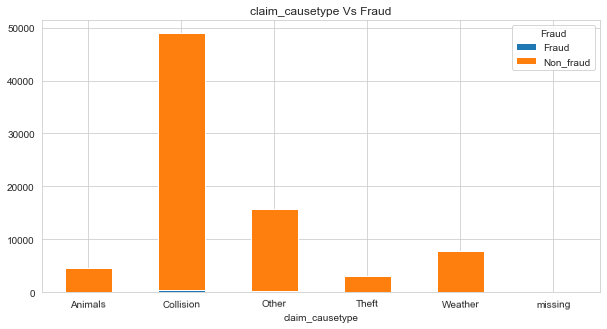

In [63]:
count_stack_bar(train_data ,'claim_causetype')

In [64]:
## Using group by to show the precentage of the fraud in claim_causetype column
df =train_data.groupby(['claim_causetype']).agg(total_customers=('sys_claimid','nunique'),total_fraud_customers=("label","sum")).reset_index()
df["fraud_perc"]=(df['total_fraud_customers']/df['total_customers'])*100
df1 =df.sort_values('total_customers',ascending=False)
df1

,claim_causetype,total_customers,total_fraud_customers,fraud_perc
1,Collision,48953,352,0.719057
2,Other,15662,122,0.778955
4,Weather,7693,60,0.779930
0,Animals,4654,29,0.623120
3,Theft,3034,52,1.713909
5,missing,2,0,0.000000


In [65]:
## The highest percentage of fraud happening is in theft

#### Object_make

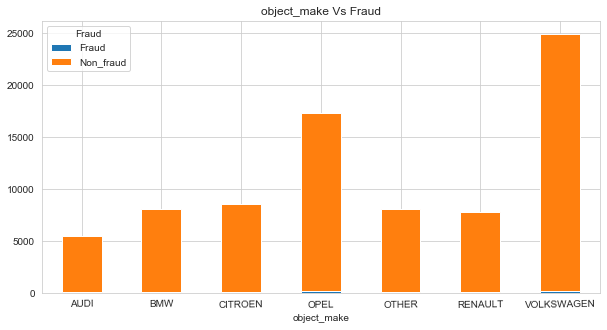

In [66]:
count_stack_bar(train_data ,'object_make')

In [67]:
df =train_data.groupby(['object_make']).agg(total_customers=('sys_claimid','nunique'),total_fraud_customers=("label","sum")).reset_index()
df["fraud_perc"]=100*(df['total_fraud_customers']/df['total_customers'])
df1 =df.sort_values('total_customers',ascending=False)
df1

,object_make,total_customers,total_fraud_customers,fraud_perc
6,VOLKSWAGEN,24917,139,0.557852
3,OPEL,17237,144,0.835412
2,CITROEN,8520,60,0.704225
1,BMW,8068,79,0.979177
4,OTHER,8007,61,0.761833
5,RENAULT,7788,59,0.757576
0,AUDI,5461,73,1.336752


In [68]:
## Highest percentage of fraud is in high end cars like AUDI and BMW

#### Gender

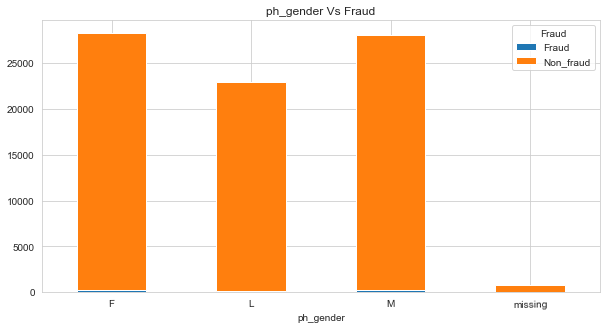

In [69]:
count_stack_bar(train_data ,'ph_gender')

In [70]:
df =train_data.groupby(['ph_gender']).agg(total_customers=('sys_claimid','nunique'),total_fraud_customers=("label","sum")).reset_index()
df["fraud_perc"]=100*(df['total_fraud_customers']/df['total_customers'])
df1 =df.sort_values('total_customers',ascending=False)
df1

,ph_gender,total_customers,total_fraud_customers,fraud_perc
0,F,28237,236,0.835783
2,M,28047,210,0.748743
1,L,22916,165,0.720021
3,missing,798,4,0.501253


In [71]:
### The highest percentage of fraud is with Female customers

#### Policy_fleet_flag

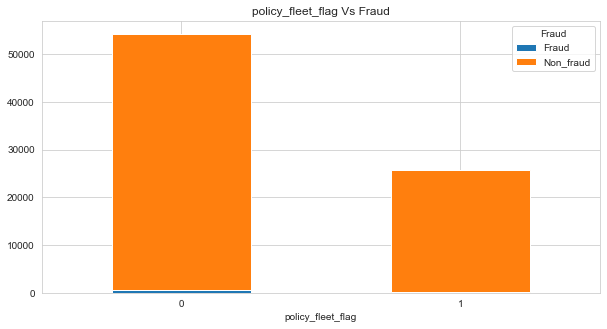

In [72]:
count_stack_bar(train_data ,'policy_fleet_flag')

In [73]:
df =train_data.groupby(['policy_fleet_flag']).agg(total_customers=('sys_claimid','nunique'),total_fraud_customers=("label","sum")).reset_index()
df["fraud_perc"]=100*(df['total_fraud_customers']/df['total_customers'])
df1 =df.sort_values('total_customers',ascending=False)
df1

,policy_fleet_flag,total_customers,total_fraud_customers,fraud_perc
0,0,54280,484,0.891673
1,1,25718,131,0.509371


In [74]:
### Fraud percentage is higher in non fleet customers (Individual Customer)

#### Policy_profitability

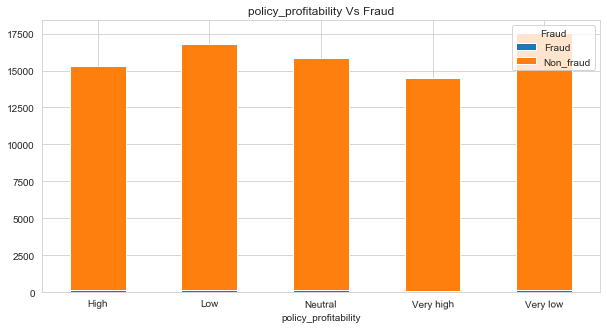

In [75]:
count_stack_bar(train_data,'policy_profitability')

In [76]:
df =train_data.groupby(['policy_profitability']).agg(total_customers=('sys_claimid','nunique'),total_fraud_customers=("label","sum")).reset_index()
df["fraud_perc"]=100*(df['total_fraud_customers']/df['total_customers'])
df1 =df.sort_values('total_customers',ascending=False)
df1

,policy_profitability,total_customers,total_fraud_customers,fraud_perc
4,Very low,17528,137,0.781607
1,Low,16817,141,0.838437
2,Neutral,15865,130,0.819414
0,High,15288,108,0.706436
3,Very high,14500,99,0.682759


In [77]:
## Fraud percentage is higher when the profit is low

#### Claim_location_urban_area

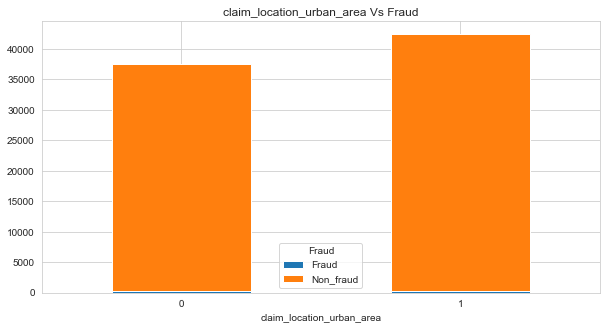

In [78]:
count_stack_bar(train_data,'claim_location_urban_area')

In [79]:
df =train_data.groupby(['claim_location_urban_area']).agg(total_customers=('sys_claimid','nunique'),total_fraud_customers=("label","sum")).reset_index()
df["fraud_perc"]=100*(df['total_fraud_customers']/df['total_customers'])
df1 =df.sort_values('total_customers',ascending=False)
df1

,claim_location_urban_area,total_customers,total_fraud_customers,fraud_perc
1,1,42464,358,0.843067
0,0,37534,257,0.684713


In [80]:
## Fraud percentage is higher in urban areas

#### Difference in days between claim occurance and reporting

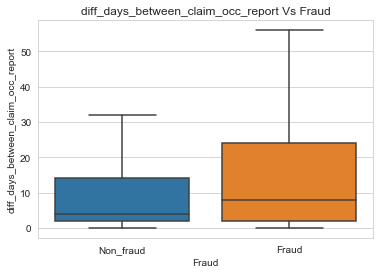

In [81]:
sns.boxplot(x="Fraud", y="diff_days_between_claim_occ_report", data=train_data, showfliers = False)
plt.title("diff_days_between_claim_occ_report Vs Fraud")
plt.show()

In [82]:
## The NON fraud cases take less time to claim

#### Claim_amount_claimed_total_new

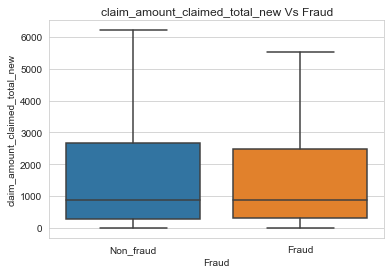

In [83]:
sns.boxplot(x="Fraud", y="claim_amount_claimed_total_new", data=train_data, showfliers = False)
plt.title("claim_amount_claimed_total_new Vs Fraud")
plt.show()

In [84]:
## Claim amount is almost the same in both the cases

#### Policy_insured_amount

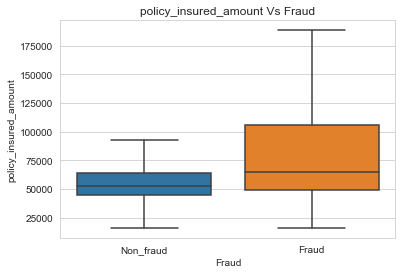

In [85]:
sns.boxplot(x="Fraud", y="policy_insured_amount", data=train_data, showfliers = False)
plt.title("policy_insured_amount Vs Fraud")
plt.show()

In [86]:
# The Fraud cases have more policy insured amount

In [151]:
train_data.shape

(79998, 18)

## Dividing the dataset in categorical and numerical datatypes

In [87]:
categoricals = train_data.select_dtypes(np.object)
categoricals.head()


,sys_claimid,claim_causetype,object_make,ph_firstname,ph_gender,ph_name,policy_profitability,Fraud
8380,MTR-341919822-02,Weather,OTHER,Mahmood,M,el-Sarah,Low,Non_fraud
65865,MTR-876039500-02,Collision,VOLKSWAGEN,Haifaaa,L,al-Sinai,Very low,Non_fraud
2113,MTR-573586408-02,Other,AUDI,Natacha,F,Fulton,Low,Non_fraud
27671,MTR-144279619-02,Collision,RENAULT,Amy,L,Starbird,Very high,Non_fraud
13793,MTR-225054348-02,Theft,CITROEN,Triana,F,Goff,Low,Non_fraud


In [88]:
categoricals['ph_gender'].value_counts()

F          28237
M          28047
L          22916
missing      798
Name: ph_gender, dtype: int64

In [89]:
# Converting Null and L into 'other' column
categoricals['ph_gender'] = categoricals['ph_gender'].apply(lambda x : 'other' if x == 'L' or x == 'missing' else x)

/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
categoricals['ph_gender'].value_counts()

F        28237
M        28047
other    23714
Name: ph_gender, dtype: int64

In [91]:
categoricals.columns

Index(['sys_claimid', 'claim_causetype', 'object_make', 'ph_firstname',
       'ph_gender', 'ph_name', 'policy_profitability', 'Fraud'],
      dtype='object')

In [92]:
categoricals.describe()

,sys_claimid,claim_causetype,object_make,ph_firstname,ph_gender,ph_name,policy_profitability,Fraud
count,79998,79998,79998,79998,79998,79998,79998,79998
unique,79998,6,7,11485,3,18237,5,2
top,MTR-915643175-02,Collision,VOLKSWAGEN,Michael,F,Nguyen,Very low,Non_fraud
freq,1,48953,24917,552,28237,630,17528,79383


In [93]:
# Checking the nulls
categoricals.isna().sum()

sys_claimid             0
claim_causetype         0
object_make             0
ph_firstname            0
ph_gender               0
ph_name                 0
policy_profitability    0
Fraud                   0
dtype: int64

In [94]:
## Columns to drop before dummifying for the model
col_drop = ['sys_claimid','ph_firstname','ph_name']

In [95]:
categoricals.drop(columns=col_drop, axis = 1,inplace=True)

/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
categoricals.head()

,claim_causetype,object_make,ph_gender,policy_profitability,Fraud
8380,Weather,OTHER,M,Low,Non_fraud
65865,Collision,VOLKSWAGEN,other,Very low,Non_fraud
2113,Other,AUDI,F,Low,Non_fraud
27671,Collision,RENAULT,other,Very high,Non_fraud
13793,Theft,CITROEN,F,Low,Non_fraud


The categorical columns are:  ['claim_causetype', 'object_make', 'ph_gender', 'policy_profitability', 'Fraud']

Frequency analysis of column:  claim_causetype
count         79998
unique            6
top       Collision
freq          48953
Name: claim_causetype, dtype: object


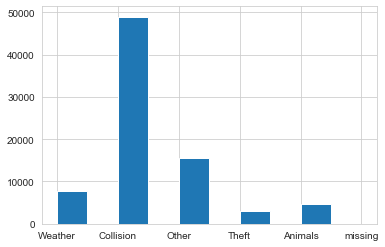

Frequency analysis of column:  object_make
count          79998
unique             7
top       VOLKSWAGEN
freq           24917
Name: object_make, dtype: object


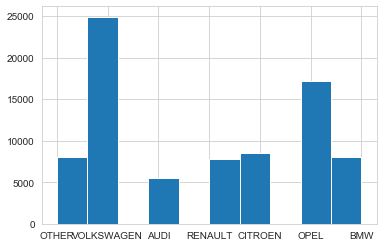

Frequency analysis of column:  ph_gender
count     79998
unique        3
top           F
freq      28237
Name: ph_gender, dtype: object


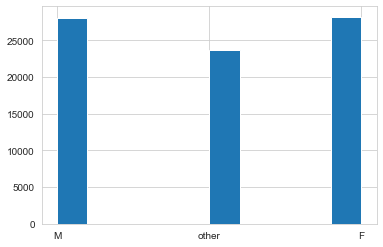

Frequency analysis of column:  policy_profitability
count        79998
unique           5
top       Very low
freq         17528
Name: policy_profitability, dtype: object


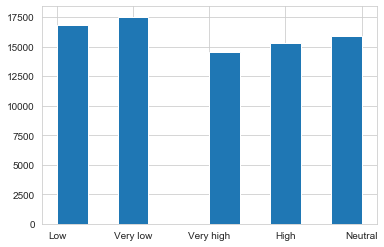

Frequency analysis of column:  Fraud
count         79998
unique            2
top       Non_fraud
freq          79383
Name: Fraud, dtype: object


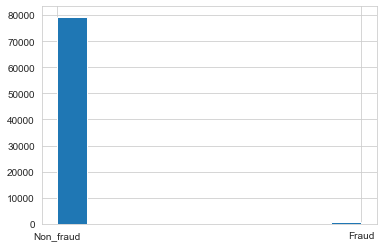

In [97]:
cols_cat = list(categoricals.columns)

print("The categorical columns are: ",cols_cat)
print("========================================")
print()

for col in cols_cat:
    print("Frequency analysis of column: ",col)
    print (categoricals[col].describe())
    plt.hist(categoricals[col])
    plt.show()

In [98]:
### Dummifing the cleaned categorical data
categoricals = pd.get_dummies(categoricals, columns = ['claim_causetype', 'object_make', 'ph_gender', 'policy_profitability','Fraud'],drop_first=True)
categoricals.head()

,claim_causetype_Collision,claim_causetype_Other,claim_causetype_Theft,claim_causetype_Weather,claim_causetype_missing,object_make_BMW,object_make_CITROEN,object_make_OPEL,object_make_OTHER,object_make_RENAULT,object_make_VOLKSWAGEN,ph_gender_M,ph_gender_other,policy_profitability_Low,policy_profitability_Neutral,policy_profitability_Very high,policy_profitability_Very low,Fraud_Non_fraud
8380,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
65865,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
2113,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
27671,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
13793,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [99]:
categoricals.shape

(79998, 18)

In [100]:
categoricals.columns

Index(['claim_causetype_Collision', 'claim_causetype_Other',
       'claim_causetype_Theft', 'claim_causetype_Weather',
       'claim_causetype_missing', 'object_make_BMW', 'object_make_CITROEN',
       'object_make_OPEL', 'object_make_OTHER', 'object_make_RENAULT',
       'object_make_VOLKSWAGEN', 'ph_gender_M', 'ph_gender_other',
       'policy_profitability_Low', 'policy_profitability_Neutral',
       'policy_profitability_Very high', 'policy_profitability_Very low',
       'Fraud_Non_fraud'],
      dtype='object')

In [101]:
#categoricals = categoricals.drop('Fraud_Non_fraud',axis = 1)

## Checking the Numerical Column for model

In [102]:
numericals = train_data.select_dtypes(np.number)
numericals.head()

,claim_location_urban_area,policy_fleet_flag,policy_insured_amount,len_claimid,diff_days_between_claim_occ_report,claim_amount_claimed_total_new,Age_of_vehicle,time_since_claim,label
8380,1,0,87167.0,16,22.0,2263.0,8.0,12.107025,0
65865,0,0,57917.0,16,0.0,70.0,1.0,12.107025,0
2113,0,0,79909.0,16,20.0,653.0,10.0,12.107025,0
27671,1,0,NaN,16,0.0,9349.0,0.0,12.107025,0
13793,0,0,74656.0,16,14.0,600.0,7.0,12.107025,0


In [103]:
numericals.shape

(79998, 9)

In [104]:
numericals.describe()

,claim_location_urban_area,policy_fleet_flag,policy_insured_amount,len_claimid,diff_days_between_claim_occ_report,claim_amount_claimed_total_new,Age_of_vehicle,time_since_claim,label
count,79998.000000,79998.000000,49179.000000,79998.0,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000
mean,0.530813,0.321483,60009.746802,16.0,20.025513,3073.212343,6.314708,9.215268,0.007688
std,0.499053,0.467049,24626.506285,0.0,72.146486,8231.916325,5.104854,1.628579,0.087342
min,0.000000,0.000000,6531.000000,16.0,0.000000,2.000000,0.000000,6.499791,0.000000
25%,0.000000,0.000000,44928.000000,16.0,2.000000,296.000000,2.000000,7.827676,0.000000
50%,1.000000,0.000000,53102.000000,16.0,4.000000,883.000000,5.000000,9.106279,0.000000
75%,1.000000,1.000000,64159.000000,16.0,14.000000,2657.000000,9.000000,10.639507,0.000000
max,1.000000,1.000000,193681.000000,16.0,2778.000000,424720.000000,68.000000,12.107025,1.000000


In [105]:
numericals = numericals.drop('len_claimid',axis=1)
numericals.head()

,claim_location_urban_area,policy_fleet_flag,policy_insured_amount,diff_days_between_claim_occ_report,claim_amount_claimed_total_new,Age_of_vehicle,time_since_claim,label
8380,1,0,87167.0,22.0,2263.0,8.0,12.107025,0
65865,0,0,57917.0,0.0,70.0,1.0,12.107025,0
2113,0,0,79909.0,20.0,653.0,10.0,12.107025,0
27671,1,0,NaN,0.0,9349.0,0.0,12.107025,0
13793,0,0,74656.0,14.0,600.0,7.0,12.107025,0


claim_location_urban_area


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


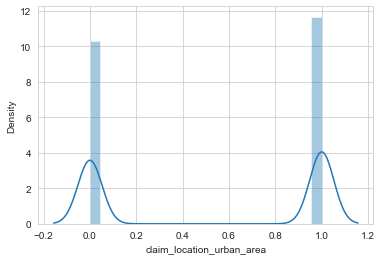

policy_fleet_flag


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


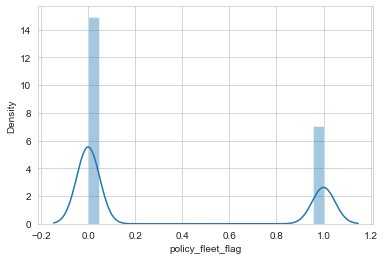

policy_insured_amount


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


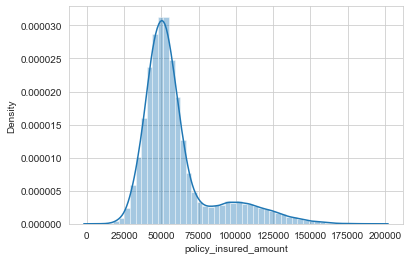

diff_days_between_claim_occ_report


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


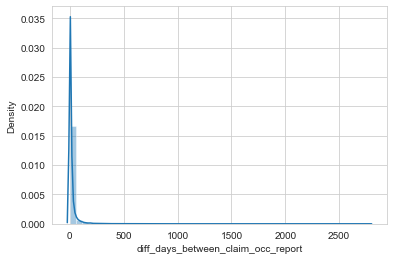

claim_amount_claimed_total_new


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


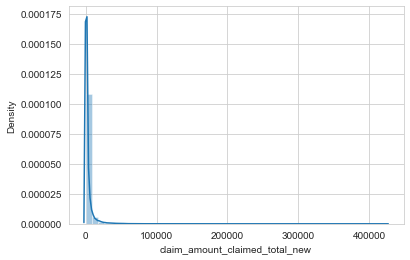

Age_of_vehicle


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


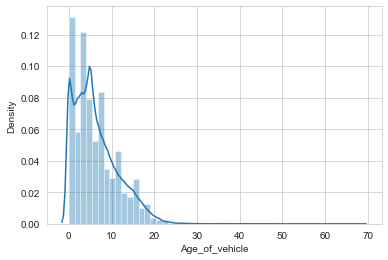

time_since_claim


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


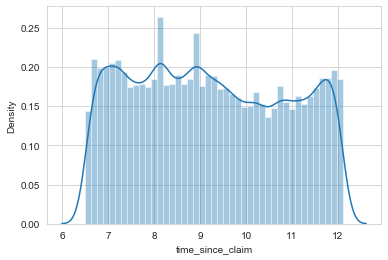

label


/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


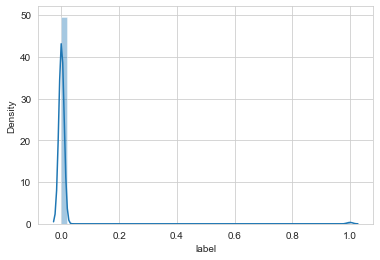

In [106]:
for col in numericals.columns:
    print (col)
    sns.distplot(numericals[col])
    plt.show()

In [107]:
numericals.shape

(79998, 8)

In [108]:
## Checking for nulls
numericals.isna().sum()

claim_location_urban_area                 0
policy_fleet_flag                         0
policy_insured_amount                 30819
diff_days_between_claim_occ_report        0
claim_amount_claimed_total_new            0
Age_of_vehicle                            0
time_since_claim                          0
label                                     0
dtype: int64

In [109]:
## Using the average of the column to fill the na values
numericals['policy_insured_amount'] = numericals['policy_insured_amount'].fillna(np.mean(numericals['policy_insured_amount']))

In [110]:
numericals.isna().sum()

claim_location_urban_area             0
policy_fleet_flag                     0
policy_insured_amount                 0
diff_days_between_claim_occ_report    0
claim_amount_claimed_total_new        0
Age_of_vehicle                        0
time_since_claim                      0
label                                 0
dtype: int64

## Heat map (pearson) for checking the multicollinearity

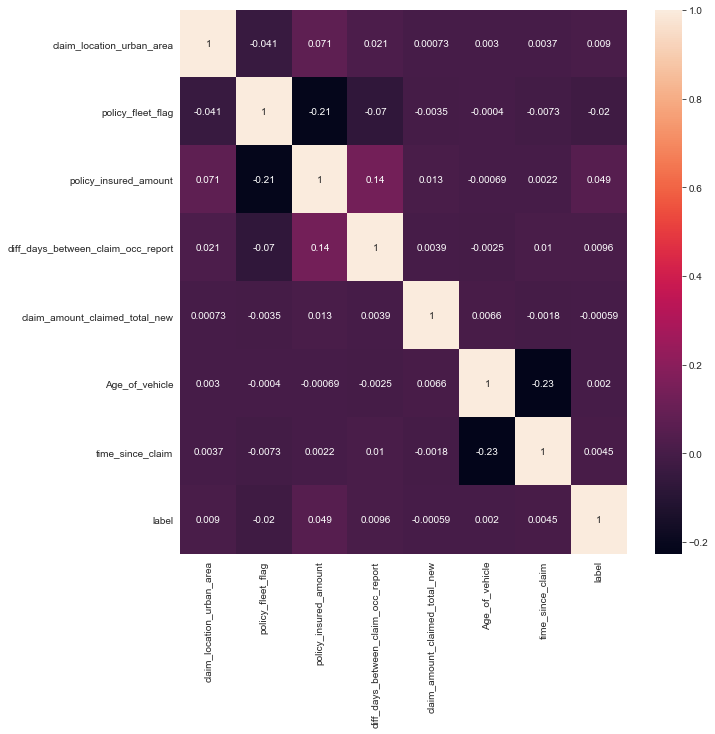

In [111]:
## checking the correlation of numerical columns with heat map
corr_matrix=numericals.corr(method='pearson') # default
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [112]:
### Final dataset for using further
final_dataset = pd.concat((categoricals,numericals),axis = 1).drop(columns = ['Fraud_Non_fraud'],axis=1)

In [113]:
final_dataset.head()

,claim_causetype_Collision,claim_causetype_Other,claim_causetype_Theft,claim_causetype_Weather,claim_causetype_missing,object_make_BMW,object_make_CITROEN,object_make_OPEL,object_make_OTHER,object_make_RENAULT,...,policy_profitability_Very high,policy_profitability_Very low,claim_location_urban_area,policy_fleet_flag,policy_insured_amount,diff_days_between_claim_occ_report,claim_amount_claimed_total_new,Age_of_vehicle,time_since_claim,label
8380,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,87167.000000,22.0,2263.0,8.0,12.107025,0
65865,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,57917.000000,0.0,70.0,1.0,12.107025,0
2113,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,79909.000000,20.0,653.0,10.0,12.107025,0
27671,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,60009.746802,0.0,9349.0,0.0,12.107025,0
13793,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,74656.000000,14.0,600.0,7.0,12.107025,0


## X-Y train test split on the data

In [114]:
## Change the label to fraud and non - fraud
y = numericals['label']
x = pd.concat((categoricals,numericals),axis = 1).drop(columns = ['label','Fraud_Non_fraud'],axis=1)

In [115]:
x.shape

(79998, 24)

In [116]:
y.value_counts()

0    79383
1      615
Name: label, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

## Logistic Regression on the train_data

The accuracy of the model on test set is: 0.99 
The Kapa of your model is:  0.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       118
           0       0.99      1.00      1.00     15882

    accuracy                           0.99     16000
   macro avg       0.50      0.50      0.50     16000
weighted avg       0.99      0.99      0.99     16000



/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


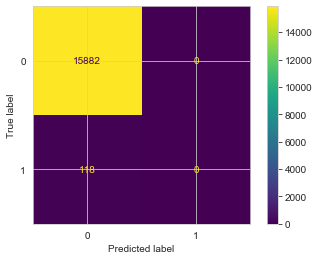

In [118]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

predictions = classification.predict(X_test)

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print("The Kapa of your model is: ",round(cohen_kappa_score(y_test,predictions),3))

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, labels=[1,0]))

confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  
plt.show()

## SMOTE- Oversampling

In [119]:
## Change the label to fraud and non - fraud
y = numericals['label']
x = pd.concat((categoricals,numericals),axis = 1).drop(columns = ['label','Fraud_Non_fraud'],axis=1)

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

In [121]:
y_train.value_counts()

0    63501
1      497
Name: label, dtype: int64

In [122]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X_train, y_train)
y_sm = y_sm.to_numpy()
y_sm = pd.Series(data=y_sm.flatten())
y_sm.value_counts()

1    63501
0    63501
dtype: int64

The accuracy of the logistic_regression model is: 0.07 
The kappa of the logistic regression model is: 0.00 
              precision    recall  f1-score   support

           1       0.01      0.98      0.02       118
           0       1.00      0.06      0.11     15882

    accuracy                           0.07     16000
   macro avg       0.50      0.52      0.06     16000
weighted avg       0.99      0.07      0.11     16000



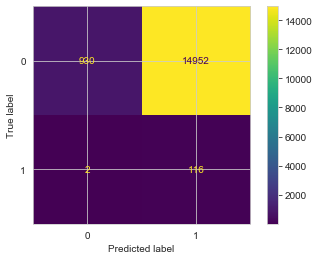

In [123]:


classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_sm, y_sm.values.ravel())
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1,0]))

plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()

## Random Forest Classifer using SMOTE

In [124]:
## importing Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [125]:
## Taking the X,Y values from smote
#X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=56)

#   svc = SVC(random_state=42)    svc.fit(X_train, y_train)
clf = RandomForestClassifier(random_state=56).fit(X_sm, y_sm.values.ravel())

In [126]:
predictions = clf.predict(X_test)

The accuracy of the logistic_regression model is: 0.99 
The kappa of the logistic regression model is: -0.01 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       118
           0       0.99      0.99      0.99     15882

    accuracy                           0.99     16000
   macro avg       0.50      0.50      0.50     16000
weighted avg       0.99      0.99      0.99     16000



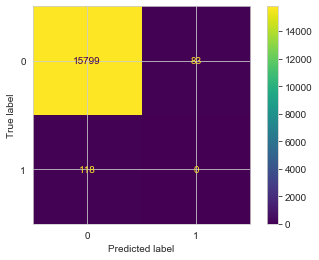

Feature: 0, Score: 0.05096
Feature: 1, Score: 0.04951
Feature: 2, Score: 0.01428
Feature: 3, Score: 0.03496
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.02466
Feature: 6, Score: 0.03776
Feature: 7, Score: 0.04688
Feature: 8, Score: 0.03562
Feature: 9, Score: 0.03293
Feature: 10, Score: 0.07289
Feature: 11, Score: 0.04686
Feature: 12, Score: 0.05256
Feature: 13, Score: 0.04294
Feature: 14, Score: 0.03504
Feature: 15, Score: 0.03531
Feature: 16, Score: 0.04543
Feature: 17, Score: 0.01663
Feature: 18, Score: 0.05700
Feature: 19, Score: 0.06511
Feature: 20, Score: 0.05918
Feature: 21, Score: 0.05562
Feature: 22, Score: 0.04993
Feature: 23, Score: 0.03794


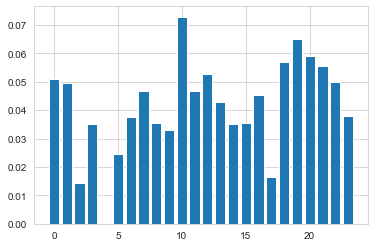

In [127]:
y_pred = clf.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (clf.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1,0]))

plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()


# get importance

importance = clf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance

from matplotlib import pyplot

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [230]:
final_dataset.shape

(79998, 25)

## Isolation Forest

In [128]:
from sklearn.ensemble import IsolationForest

In [129]:
## Trying to seperate the legit cases and fraud cases
inliers = final_dataset[final_dataset.label==0]
inliers = inliers.drop(['label'], axis=1)
outliers = final_dataset[final_dataset.label==1]
outliers = outliers.drop(['label'], axis=1)
inliers_train, inliers_test = train_test_split(inliers, test_size=0.30, random_state=42)

In [130]:
inliers_train.head()

,claim_causetype_Collision,claim_causetype_Other,claim_causetype_Theft,claim_causetype_Weather,claim_causetype_missing,object_make_BMW,object_make_CITROEN,object_make_OPEL,object_make_OTHER,object_make_RENAULT,...,policy_profitability_Neutral,policy_profitability_Very high,policy_profitability_Very low,claim_location_urban_area,policy_fleet_flag,policy_insured_amount,diff_days_between_claim_occ_report,claim_amount_claimed_total_new,Age_of_vehicle,time_since_claim
27037,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,62301.000000,44.0,3643.0,4.0,11.660746
37280,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,60009.746802,18.0,447.0,14.0,6.562763
69183,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,60009.746802,4.0,473.0,2.0,7.671615
37807,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,60009.746802,33.0,106.0,6.0,7.731849
36773,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,38280.000000,6.0,21460.0,8.0,9.705880


In [131]:
inliers_train.shape

(55568, 24)

In [213]:
inliers_test.head()

,claim_causetype_Collision,claim_causetype_Other,claim_causetype_Theft,claim_causetype_Weather,claim_causetype_missing,object_make_BMW,object_make_CITROEN,object_make_OPEL,object_make_OTHER,object_make_RENAULT,...,policy_profitability_Neutral,policy_profitability_Very high,policy_profitability_Very low,claim_location_urban_area,policy_fleet_flag,policy_insured_amount,diff_days_between_claim_occ_report,claim_amount_claimed_total_new,Age_of_vehicle,time_since_claim
76083,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,60009.746802,5.0,375.0,1.0,10.874967
65522,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,60009.746802,67.0,202.0,5.0,8.241100
62455,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,60009.746802,3.0,4324.0,0.0,11.608726
58411,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,60009.746802,8.0,203.0,1.0,11.833234
23503,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,58857.000000,4.0,68.0,2.0,9.963244


In [133]:
inliers_test.shape

(23815, 24)

In [211]:
## using the model to predict the accuracy of legit cases and fraud cases
model = IsolationForest()
model.fit(inliers_train)
inlier_pred_test = model.predict(inliers_test)
outlier_pred = model.predict(outliers)

In [212]:
print("Accuracy in Detecting Legit Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.6516901112744069
Accuracy in Detecting Fraud Cases: 0.416260162601626


In [219]:
print(classification_report(np.ones(615)* -1,outlier_pred, labels=[1,-1]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
          -1       1.00      0.42      0.59       615

    accuracy                           0.42       615
   macro avg       0.50      0.21      0.29       615
weighted avg       1.00      0.42      0.59       615



In [228]:
#Checking the model with validation set
validation_data = pd.read_csv('validation_dataset_dummified.csv')

In [233]:
validation_data = validation_data.drop('Unnamed: 0',axis=1)

In [234]:
validation_data.shape

(20000, 25)

In [235]:
checking = model.predict(validation_data.drop('label',axis = 1))

In [237]:
checking

array([ 1,  1,  1, ...,  1,  1, -1])

In [243]:
y_test = validation_data['label'].apply(lambda x: -1 if x == 1 else 1)

In [244]:
y_test.value_counts()

 1    19864
-1      136
Name: label, dtype: int64

In [245]:
print(classification_report(y_test,checking))

              precision    recall  f1-score   support

          -1       0.01      0.46      0.02       136
           1       0.99      0.63      0.77     19864

    accuracy                           0.62     20000
   macro avg       0.50      0.54      0.39     20000
weighted avg       0.99      0.62      0.76     20000



In [ ]:
## 46 % are really frauds

## LocalOutlierfactor

In [136]:
## using Localoutlierfactor for prediction
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(novelty=True)
model.fit(inliers_train)
inlier_pred_test = model.predict(inliers_test)
outlier_pred = model.predict(outliers)

In [137]:
print("Accuracy in Detecting Legit Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.975015746378333
Accuracy in Detecting Fraud Cases: 0.032520325203252036


## Tranforming the data using standard scaler

In [138]:
## Change the label to fraud and non - fraud
y = numericals['label']
x = pd.concat((categoricals,numericals),axis = 1).drop(columns = ['label','Fraud_Non_fraud'],axis=1)

In [139]:
## standard scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x)
scaled_x = transformer.transform(x)

The accuracy of the logistic_regression model is: 0.99  

The kappa of the logistic regression model is: 0.00  

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15868
           1       0.00      0.00      0.00       132

    accuracy                           0.99     16000
   macro avg       0.50      0.50      0.50     16000
weighted avg       0.98      0.99      0.99     16000



/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


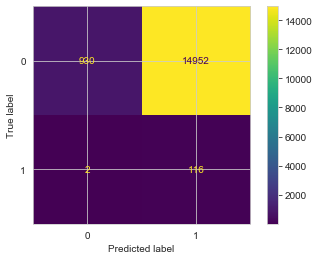

In [140]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(scaled_x, y, test_size=0.2, random_state=100)

reg_scale = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_scale, y_train_scale)
y_pred_scale = reg_scale.predict(X_test_scale)

print("The accuracy of the logistic_regression model is: %4.2f "% (reg_scale.score(X_test_scale, y_test_scale)),'\n')
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred_scale,y_test_scale)),'\n' )
print(classification_report(y_test_scale,y_pred_scale))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  
plt.show()

## KNN-Model using smote data

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors = list(range(1,9,2)) # Creating odd list K for KNN, avoiding evens incase of ties

cv_scores = [ ] #list that will hold cv scores

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=56)

<function matplotlib.pyplot.show(*args, **kw)>

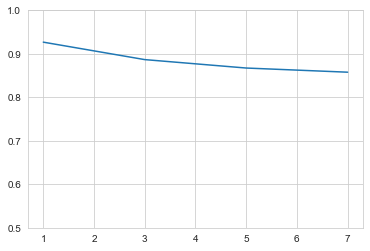

In [143]:
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_sm,y_sm.values.ravel(),cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean())
    #Plot the cv_scores results
sns.lineplot(x = neighbors, y = cv_scores)
plt.ylim(0.5,1)
plt.show

In [144]:
neigh = KNeighborsClassifier(n_neighbors=1).fit(X_sm, y_sm.values.ravel())

The accuracy of the logistic_regression model is: 1.00 
The kappa of the logistic regression model is: 1.00 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12814
           0       1.00      1.00      1.00     12587

    accuracy                           1.00     25401
   macro avg       1.00      1.00      1.00     25401
weighted avg       1.00      1.00      1.00     25401



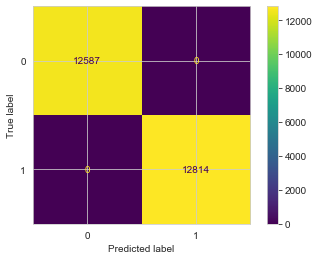

In [145]:
y_pred = neigh.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (neigh.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1,0]))

plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()

## Using the validation data

In [152]:
train_data.shape

(79998, 18)

In [153]:
train_data.columns

Index(['sys_claimid', 'claim_causetype', 'claim_location_urban_area',
       'object_make', 'ph_firstname', 'ph_gender', 'ph_name',
       'policy_fleet_flag', 'policy_insured_amount', 'policy_profitability',
       'len_claimid', 'diff_days_between_claim_occ_report',
       'claim_amount_claimed_total_new', 'is_duplicate', 'Age_of_vehicle',
       'time_since_claim', 'label', 'Fraud'],
      dtype='object')

In [156]:
col_to_drop = ['len_claimid','Fraud','is_duplicate']

In [158]:
train_data.drop(columns = col_to_drop ,axis=1,inplace=True)

In [159]:
train_data.shape

(79998, 15)

In [185]:
## Converting dataframe into csv file
train_data.to_csv('data_for_analysis.csv')

In [223]:
val_data = pd.read_csv('cleaned_validation_data.csv')

In [224]:
val_data.head()

,Unnamed: 0,sys_claimid,claim_causetype,claim_location_urban_area,object_make,ph_firstname,ph_gender,ph_name,policy_fleet_flag,policy_insured_amount,policy_profitability,label,diff_days_between_claim_occ_report,claim_amount_claimed_total_new,Age_of_vehicle,time_since_claim
0,4493,MTR-845197269-02,Animals,0,VOLKSWAGEN,Simon,M,Baker,1,43777.0,High,0,6.0,9388.0,4.0,10.160373
1,708,MTR-277591109-02,Collision,0,AUDI,Melissa,other,Newcomb,0,NaN,High,0,6.0,360.0,5.0,10.160373
2,18898,MTR-783277250-02,Collision,0,OTHER,Kathy,F,Thapa,0,59590.0,Low,0,0.0,9349.0,0.0,10.160373
3,4646,MTR-128255363-02,Collision,1,OPEL,Christian,other,Graham,1,50808.0,Very high,0,2.0,4063.0,1.0,10.160373
4,14657,MTR-251228076-02,Collision,0,VOLKSWAGEN,Jonathan,M,Ortega,0,NaN,Very high,0,1.0,79.0,0.0,10.160373


In [225]:
val_data.columns

Index(['Unnamed: 0', 'sys_claimid', 'claim_causetype',
       'claim_location_urban_area', 'object_make', 'ph_firstname', 'ph_gender',
       'ph_name', 'policy_fleet_flag', 'policy_insured_amount',
       'policy_profitability', 'label', 'diff_days_between_claim_occ_report',
       'claim_amount_claimed_total_new', 'Age_of_vehicle', 'time_since_claim'],
      dtype='object')

In [226]:
val_data = val_data.drop('Unnamed: 0',axis=1)

In [227]:
val_data.shape

(20000, 15)

## LightGBM

In [ ]:
pip install lightgbm

In [ ]:
conda install lightgbm

In [170]:
import lightgbm as lgb

/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [171]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

import datetime

from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [172]:
#converting all categorical features to "category type" for LGBM to work
for c in train_data.columns:
    if ((train_data[c].dtypes == "object") | (train_data[c].dtypes == "bool") ):
      #print(c)
      train_data[c] = train_data[c].astype('category')

for c in val_data.columns:
    if ((val_data[c].dtypes == "object") | (val_data[c].dtypes == "bool") ):
      #print(c)
      val_data[c] = val_data[c].astype('category')

In [173]:
# Train test 80-20 random split (startified random sampling on fraud rate)
X_train, X_test, y_train, y_test  = train_test_split(train_data.drop(columns=["sys_claimid","label"]),train_data.label, test_size=0.20,stratify = train_data.label, random_state=44)

X_train, X_test, y_train, y_test = X_train.reset_index(drop = True), X_test.reset_index(drop = True), y_train.reset_index(drop = True), y_test.reset_index(drop = True)



# LGBM using "scale post weight" for handling imbalance

In [202]:
#LGBM using "scale post weight" for handling imbalance

#calculation for scale pos weight
# scale pos weight = sqrt(count of negative class/count of positive class) or (count of negative class/count of positive class)
import math 
print("scale pos weight value:",math.sqrt((X_train.shape[0]-y_train.sum())/y_train.sum()))

#LGBM using "scale post weight" for handling imbalance
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'auc'},
    'num_leaves': 2, 
    'bagging_fraction': 0.5,
 'bagging_freq': 5,
 'feature_fraction': 0.5,
 'learning_rate': 0.01,
 'max_bins': 5,
 'min_child_weight': 90,
 'min_data_in_leaf': 500,
 'scale_pos_weight':11.361216298106365

}

d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(params, d_train, 100) #code will run for 100 iterations

#Prediction
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_val=clf.predict(val_data.drop(columns=["sys_claimid","label"]))

#checking AUC
print("Train :", roc_auc_score(y_train, y_pred_train))
print("Test :", roc_auc_score(y_test, y_pred_test))
print(" Validation :", roc_auc_score(val_data.label, y_pred_val))



scale pos weight value: 11.361216298106365
Train : 0.6751727126993186
Test : 0.634811259934732
 Validation : 0.66326183488901


In [201]:
y_pred_test

array([0.06049021, 0.05018396, 0.04677184, ..., 0.05166319, 0.04798207,
       0.0442097 ])

In [204]:
prediction_1 = np.where(y_pred_test > 0.5,1,0)

In [205]:
print(classification_report(y_test, prediction_1, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       123
           0       0.99      1.00      1.00     15877

    accuracy                           0.99     16000
   macro avg       0.50      0.50      0.50     16000
weighted avg       0.98      0.99      0.99     16000



## LGBM model without using "scale post weight" 

In [208]:
# using optimal params as per prior understanding of algorithm. (Also did some hit and trial to get these params)
#Can do more detailed search as a next step.
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'auc'},
    'num_leaves': 2, 
    'bagging_fraction': 0.5,
 'bagging_freq': 5,
 'feature_fraction': 0.5,
 'learning_rate': 0.01,
 'max_bins': 5,
 'min_child_weight': 50,
 'min_data_in_leaf': 500
}


d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(params, d_train, 100) #code will run for 100 iterations

#Prediction
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_val=clf.predict(val_data.drop(columns=["sys_claimid","label"]))

#checking AUC
print("Train :", roc_auc_score(y_train, y_pred_train))
print("Test :", roc_auc_score(y_test, y_pred_test))
print("VAL :", roc_auc_score(val_data.label, y_pred_val))

Train : 0.6316327354255497
Test : 0.6356136682863333
VAL : 0.6435596615811043


In [209]:
prediction_2 = np.where(y_pred_test > 0.5,1,0)

In [210]:
print(classification_report(y_test, prediction_2, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       123
           0       0.99      1.00      1.00     15877

    accuracy                           0.99     16000
   macro avg       0.50      0.50      0.50     16000
weighted avg       0.98      0.99      0.99     16000



## Features important as per LGBM model

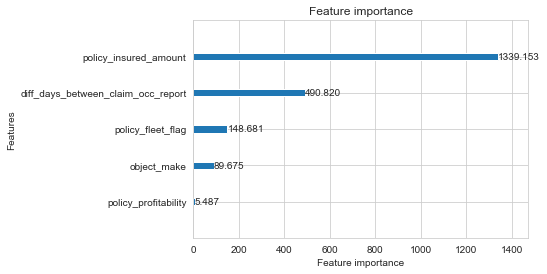

In [176]:
# Let us check Important features from the model 
import matplotlib
import matplotlib.pyplot as plt
lgb.plot_importance(clf, max_num_features=10, importance_type='gain')
plt.show()

In [ ]:
## Using the validation dataset with 20000 new IDs to valiadte the fraud

In [177]:
# if the predicted probability is > 0.008(cutoff is found out based on hit and trial using confusion matrix shown below) then 1 else 0 
# Scoring using final LGBM Model
#Prediction

y_pred_scoring_1 = pd.DataFrame(np.where(y_pred_val>0.008,1,0))
y_pred_scoring_2=pd.DataFrame(y_pred_val)

#adding claim id 
y_pred_scoring=pd.DataFrame(pd.concat([val_data.sys_claimid,y_pred_scoring_1,y_pred_scoring_2], axis=1))
y_pred_scoring.columns = [["sys_claimid","fraud","predicted_probability_of_fraud"]]
#
y_pred_scoring.head()

,sys_claimid,fraud,predicted_probability_of_fraud
0,MTR-845197269-02,0,0.006363
1,MTR-277591109-02,0,0.007530
2,MTR-783277250-02,0,0.007036
3,MTR-128255363-02,0,0.006325
4,MTR-251228076-02,0,0.007185


In [178]:
#Trying to find the decision point by hit and trial method on Train data. Choose ".0076" as it was giving decent Recall
i = 0.008
y_pred_train_cm = np.where(y_pred_train>i,1,0)

# Confusion Matrix
confusion_matrix = pd.crosstab(y_train, y_pred_train_cm, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0      1
Actual                 
0          45379  18127
1            251    241


In [186]:
#precision recall calculation train - 0.008
recall= 241/(241+251)
print("Train recall:",recall)
precision = 241/(241+18127)
print("Train precision:",precision)

Train recall: 0.4898373983739837
Train precision: 0.013120644599303136


In [181]:
# Confusion matrix in Test Data
i = 0.008
y_pred_test_cm = np.where(y_pred_test>i,1,0)
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred_test_cm, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0     1
Actual                
0          11267  4610
1             61    62


In [187]:
#precision recall calculation test
recall= 62/(61+62)
print("Test recall:",recall)
precision = 62/(62+4610)
print("Test precision:",precision)

Test recall: 0.5040650406504065
Test precision: 0.013270547945205479


In [183]:
#confusion matix for validation data

i = 0.008
y_pred_val_cm = np.where(y_pred_val>i,1,0)
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(val_data.label, y_pred_val_cm, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0     1
Actual                
0          14055  5809
1             61    75


In [188]:
#precision recall calculation validation
recall= 75/(75+61)
print("Validation recall:",recall)
precision = 75/(75+5809)
print("Validation precision:",precision)

Validation recall: 0.5514705882352942
Validation precision: 0.01274643099932019
